In [1]:
from reinforcement_training import *
from notebook_game_helper import *

Using Theano backend.


In [2]:
# lets train a DQN model!
# make the model
hiddens = [{"size":20,"activation":"relu"}]
#             {"size":20,"activation":"relu"},
#             {"size":20,"activation":"relu"}]
# make an optimizer
from keras.optimizers import sgd, RMSprop, Adagrad, Adadelta, Adam
# note to self: DON'T CHANGE THIS UNTIL YOU KNOW WE'RE LEARNING SOMETHING
optimizer = sgd(lr = 0.001)
# optimizer = Adagrad
# optimizer = RMSprop
# optimizer = Adadelta
# optimizer = Adam
model = baseline_model(optimizer, hiddens)

In [3]:
# prepare the game for training model
training_game_size = 8
training_game = NeuralNaviGame(training_game_size,
                                training_game_size,
                                model,
                                model_type = "reinforcement")
training_game.setup()

In [8]:
training_episodes = 1000
steps = 10
# train the model
output = train_model(game = training_game,
                model = model,
                episodes = training_episodes,
                steps = steps)

Episode 999, Wins: 23, Replay Loss: 4.0: 100%|██████████| 1000/1000 [00:31<00:00, 32.06it/s]00, 31.58it/s]


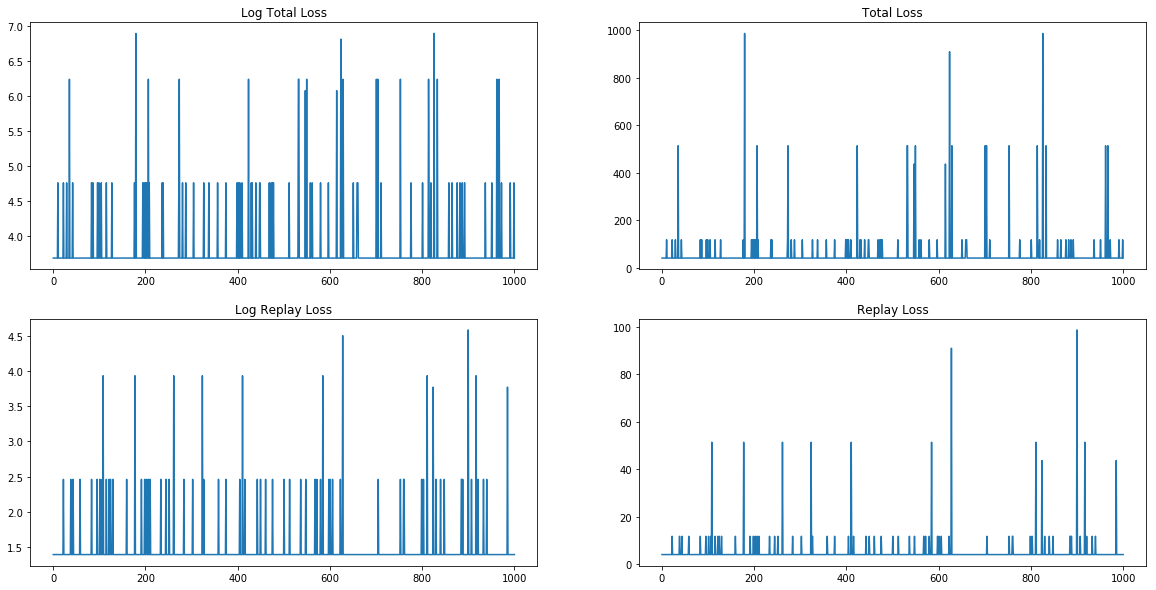

In [13]:
# plot learning info
log = [output['log'], output['replays']]
f, axarr = pl.subplots(2, 2, figsize = (20, 10))
# f.canvas.set_window_title("RL Loss, 100 eps w/ 50 steps, Look: 20")
x = np.linspace(0, len(log[0]), len(log[0]))
axarr[0, 0].plot(x, np.log(log[0]))
axarr[0, 0].set_title('Log Total Loss')
axarr[0, 1].plot(x, log[0])
axarr[0, 1].set_title('Total Loss')
axarr[1, 0].plot(x, np.log(log[1]))
axarr[1, 0].set_title('Log Replay Loss')
axarr[1, 1].plot(x, log[1])
axarr[1, 1].set_title('Replay Loss')
f.subplots_adjust(hspace=0.2)

pl.plot()
pl.savefig("rl_curve_x.png")
pl.show()

In [ ]:
val_game = NeuralNaviGame(8, 8, model = model0)

In [ ]:
val_game.setup()

In [ ]:
animate_game(val_game, n = 10)

In [ ]:
val_game.shift_goal()